# Image Style Transfer

We implement **A Neural Algorithm of Artistic Style**, an algorithm to perform image style transfer. The following example shows how to run our code. 

In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.core.display import Image, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import our functions from **style_transfer.py**.

In [21]:
from style_transfer import*

Assign the images used for content representation and style representation.

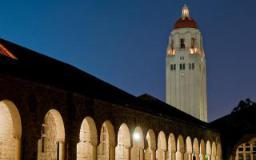

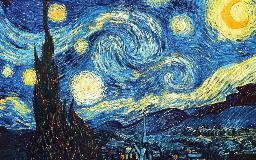

In [22]:
content_file = 'input_image/hoovertowernight.jpg'
style_file = 'input_image/starry_night.jpg' 

display(Image(content_file))
display(Image(style_file))

To run our code, you need to download a pre-trained VGG network, which is an about **535MB** mat file named **imagenet-vgg-verydeep-19.mat** (http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat), and put it on the top level of our folder.

### Style Transfer

Run the algorithm by **Style_Transfer** function.

**Style_Transfer(content_file, style_file, vgg_data, output_file, 
    content_layer, style_layers, coef_content, coef_style, 
    learning_rate, max_iter, checkpoint_iter, print_iter)**

You need to specify the image for content construction (i.e. **content_file**), the image for style construction (i.e. **style_file**), the generated image by this algorithm (i.e. **output_file**), the layer used for content representation (i.e. **content_layer**), the layers used for style representation (i.e. **style_layers**), the learning rate for Adam optimizer (i.e. **learning_rate**), the maximum number of iterations (i.e. **max_iter**), the number of iterations between check points (i.e. **checkpoint_iter**), the number of iterations between printing out images (i.e. **print_iter**), the weights for the loss of content (i.e. **coef_content**), and the weights for the loss of style (i.e. **coef_style**).


In this VGG network, total 20 layers (16 convolutional layers & 4 pooling layers) could be used for content representation and style representation. ('conv1_1', 'conv1_2', 'pool1',	'conv2_1', 'conv2_2', 'pool2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'pool3',	'conv4_1', 'conv4_2', 'conv4_3', 'conv4_4', 'pool4', 'conv5_1', 'conv5_2', 'conv5_3', 'conv5_4'). 

**content_layer** should be one specific layer of those 20 layers, e.g. 'conv4_2'. 

**style layer** should be a list of $L$ layers $(L<=5)$ from those 20 layers, e.g. ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1'].

**learning_rate**: suggested value is 10.

Ratio **coef_content/coef_style** controls the balance between the content and style of the output image. The smaller ratio is, the more emphasis is on the style. For example, ratio = 1e-5 appears like the style image while ratio = 1e-1 results a content-like picture. 

We give one example to show how to use it.

In [27]:
tf.reset_default_graph()

vgg_data = 'imagenet-vgg-verydeep-19.mat'
output_file = 'output_image/mix'
content_layer = 'conv4_2'
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

learning_rate = 10
max_iter, checkpoint_iter, print_iter = (1000, 100, 100)
coef_content, coef_style = (1e-3, 1)

output_image = Style_Transfer(content_file, style_file, vgg_data, output_file, 
    content_layer, style_layers, coef_content, coef_style, 
    learning_rate, max_iter, checkpoint_iter, print_iter)

Size of the content picture:  (160, 256, 3)
Size of the style picture:  (160, 256, 3)
Iteration: 100
Time:  88.49072508281097
Loss_content: 82160.09375
Loss_style: 51.94605255126953
Loss_total: 134.10614630126952

Iteration: 200
Time:  95.53846620512195
Loss_content: 74365.59375
Loss_style: 27.713241577148438
Loss_total: 102.07883532714844

Iteration: 300
Time:  97.95782127603889
Loss_content: 69108.3515625
Loss_style: 22.247419357299805
Loss_total: 91.35577091979981

Iteration: 400
Time:  102.99353867885657
Loss_content: 66347.2265625
Loss_style: 16.728694915771484
Loss_total: 83.07592147827148

Iteration: 500
Time:  98.17873376398347
Loss_content: 65137.73828125
Loss_style: 16.2131290435791
Loss_total: 81.3508673248291

Iteration: 600
Time:  96.52014043414965
Loss_content: 63427.5390625
Loss_style: 12.85058307647705
Loss_total: 76.27812213897705

Iteration: 700
Time:  102.50726517685689
Loss_content: 62952.15234375
Loss_style: 14.45215129852295
Loss_total: 77.40430364227295

Iteratio

Show the generated image.

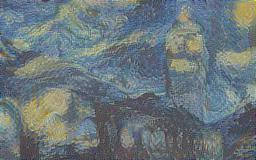

In [28]:
display(Image(output_image))

### Content Reconstruction

For the content reconstruction, we just need to assign **coef_content** as 0.

In [23]:
tf.reset_default_graph()

vgg_data = 'imagenet-vgg-verydeep-19.mat'
output_file = 'output_image/content'
content_layer = 'conv1_1'
style_layers = ['conv1_1']

learning_rate = 1
max_iter, checkpoint_iter, print_iter = (500, 100, 100)
coef_content, coef_style = (1, 0)

output_image = Style_Transfer(content_file, style_file, vgg_data, output_file, 
    content_layer, style_layers, coef_content, coef_style, 
    learning_rate, max_iter, checkpoint_iter, print_iter)

Size of the content picture:  (160, 256, 3)
Size of the style picture:  (160, 256, 3)
Iteration: 100
Time:  5.877170990919694
Loss_content: 63.28669357299805
Loss_style: 195.59060668945312
Loss_total: 63.28669357299805

Iteration: 200
Time:  4.411596425110474
Loss_content: 3.4507973194122314
Loss_style: 201.6792449951172
Loss_total: 3.4507973194122314

Iteration: 300
Time:  4.028501672903076
Loss_content: 0.30309224128723145
Loss_style: 211.63092041015625
Loss_total: 0.30309224128723145

Iteration: 400
Time:  3.9923102611210197
Loss_content: 0.09498081356287003
Loss_style: 213.34007263183594
Loss_total: 0.09498081356287003

Time:  41.61714464891702
Best iter:  400
Loss:  0.09498081356287003


Show the content construction by the layer 'conv1_1'.

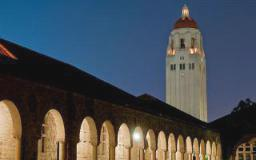

In [24]:
display(Image(output_image))

### Style Reconstruction

For the style reconstruction, we just need to assign **coef_style** as 0.

In [25]:
tf.reset_default_graph()

vgg_data = 'imagenet-vgg-verydeep-19.mat'
output_file = 'output_image/style'
content_layer = 'conv1_1'
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']

learning_rate = 10
max_iter, checkpoint_iter, print_iter = (500, 100, 100)
coef_content, coef_style = (0, 1)

output_image = Style_Transfer(content_file, style_file, vgg_data, output_file, 
    content_layer, style_layers, coef_content, coef_style, 
    learning_rate, max_iter, checkpoint_iter, print_iter)

Size of the content picture:  (160, 256, 3)
Size of the style picture:  (160, 256, 3)
Iteration: 100
Time:  86.6145675200969
Loss_content: 1906.9876708984375
Loss_style: 48.91161346435547
Loss_total: 48.91161346435547

Iteration: 200
Time:  85.58380852593109
Loss_content: 1909.3951416015625
Loss_style: 24.09781837463379
Loss_total: 24.09781837463379

Iteration: 300
Time:  84.38875640905462
Loss_content: 1922.1785888671875
Loss_style: 23.851545333862305
Loss_total: 23.851545333862305

Iteration: 400
Time:  84.07459576288238
Loss_content: 1927.107666015625
Loss_style: 11.703323364257812
Loss_total: 11.703323364257812

Iteration: 500
Time:  83.46193612017669
Loss_content: 1936.304931640625
Loss_style: 20.409669876098633
Loss_total: 20.409669876098633

Time:  447.8039796000812
Best iter:  400
Loss:  11.703323364257812


Show the style construction by the layers 'conv1_1', 'conv2_1', 'conv3_1', 'conv4_1' and 'conv5_1'.

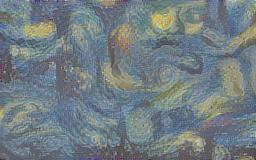

In [26]:
display(Image(output_image))